In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform, randint
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

#Import CSV File
df = pd.read_csv(r'C:\Users\kirta\OneDrive\Desktop\Projects\Food-Access-AI\Data\FoodAccessResearchAtlasData2019.xlsx - Food Access Research Atlas.csv')
df = df.dropna()

#Assign the attributes to the X and Y values
X = df[['Urban','Pop2010','OHU2010','GroupQuartersFlag','NUMGQTRS','PCTGQTRS','LILATracts_halfAnd10','LILATracts_1And20','LILATracts_Vehicle','HUNVFlag','LowIncomeTracts','PovertyRate','MedianFamilyIncome','LA1and10','LAhalfand10','LA1and20','LATracts_half','LATracts1','LATracts10','LATracts20','LATractsVehicle_20','lapophalf','lapophalfshare','lalowihalf','lalowihalfshare','lakidshalf','lakidshalfshare','laseniorshalf','laseniorshalfshare','lawhitehalf','lawhitehalfshare','lablackhalf','lablackhalfshare','laasianhalf','laasianhalfshare','lanhopihalf','lanhopihalfshare','laaianhalf','laaianhalfshare','laomultirhalf','laomultirhalfshare','lahisphalf','lahisphalfshare','lahunvhalf','lahunvhalfshare','lasnaphalf','lasnaphalfshare','TractLOWI','TractKids','TractSeniors','TractWhite','TractBlack','TractAsian','TractNHOPI','TractAIAN','TractOMultir','TractHispanic','TractHUNV','TractSNAP']]
y = df['LILATracts_1And10']


In [2]:
#Create the train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, shuffle=True)

In [3]:
#Modeling using Logistical Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

#Predict outcome from test
y_pred = model1.predict(X_test)

print("Accuracy: \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))



Accuracy: 
 0.8758276913920096
Confusion Matrix: 
 [[11181   382]
 [ 1287   591]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     11563
           1       0.61      0.31      0.41      1878

    accuracy                           0.88     13441
   macro avg       0.75      0.64      0.67     13441
weighted avg       0.86      0.88      0.86     13441



In [16]:
#Create the Random Forest Regressor Method
rf = RandomForestClassifier(n_estimators=10000)
rf.fit(X_train,y_train)
rf.feature_importances_

sorted_idx = rf.feature_importances_.argsort()

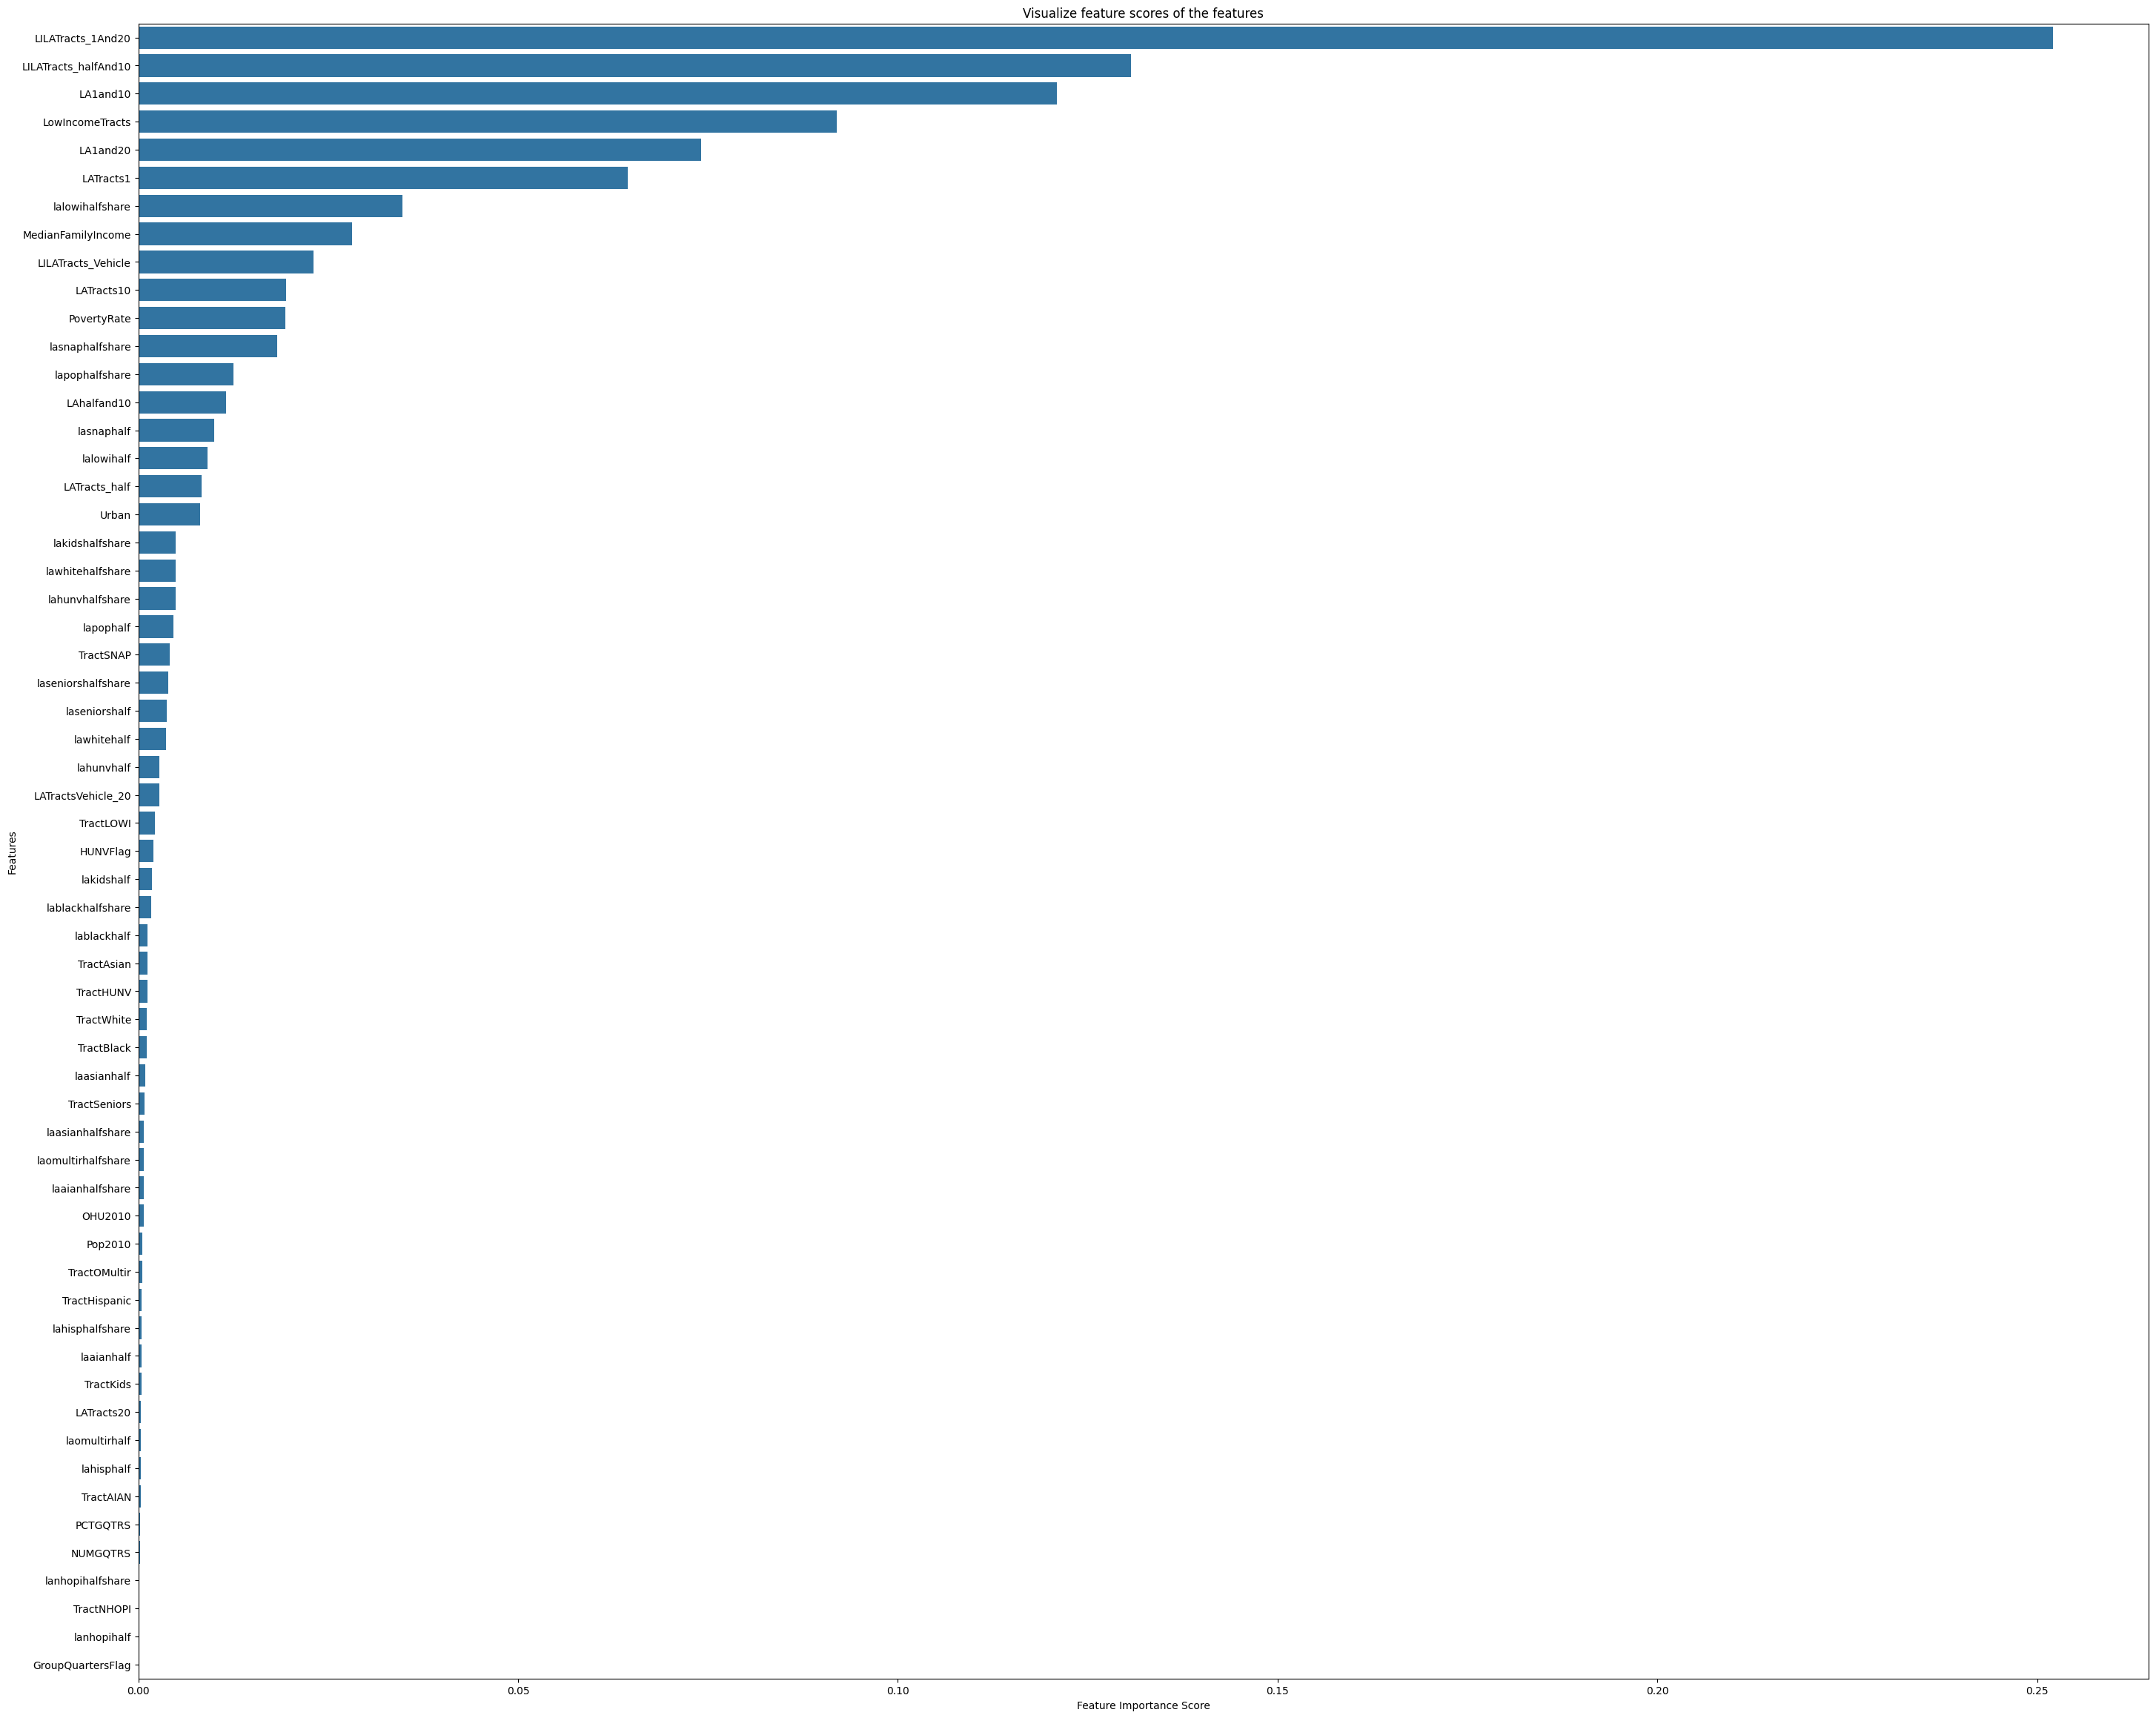

In [17]:

#Plot the Random Forest Regressor
feature_scores = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize = (35,29))
ax = sns.barplot(x=feature_scores,y=X_train.columns)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

In [3]:
#Modify X and Y Values based on feature importance
X_modified = df[['Urban','PovertyRate','MedianFamilyIncome','lapophalf','lapophalfshare','lalowihalf','lalowihalfshare','lakidshalfshare','laseniorshalf','laseniorshalfshare','lawhitehalfshare','lahunvhalfshare','lasnaphalf','lasnaphalfshare']]
y_modified = df['LILATracts_1And10']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_modified, y_modified, test_size = 0.2, random_state= 42, shuffle=True)

In [4]:
#Experiment using SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train2, y_train2)

model5 = LogisticRegression()

print(model5.get_params())

model5.fit(X_train_resampled, y_train_resampled)

#Predict outcome from test
y_pred = model5.predict(X_test2)

print("Accuracy: \n", accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

scores = cross_val_score(model5, X_modified, y_modified, cv=5)
print(scores.mean())



{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


NameError: name 'y_test' is not defined

In [6]:
#Using RandomizedSearchCV to find the best hyperparameters to adjust for LogisticRegression
param_dist = {
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'C': [0.1,1,10,100],
    'class_weight': [None,'Balanced'],
    'max_iter': [100,200,500]
}

random_search = RandomizedSearchCV(estimator=model5, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_resampled,y_train_resampled)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Best Parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'class_weight': None, 'C': 0.1}
Best Score:  0.8226768601270592


In [8]:
#Use the modified hyperparameters in a new model
logisticmodel_modified = LogisticRegression(solver='liblinear', penalty='l1', max_iter=200, class_weight='balanced', C=1)

logisticmodel_modified.fit(X_train_resampled, y_train_resampled)

#Predict outcome from test
y_pred = logisticmodel_modified.predict(X_test2)

print("Accuracy: \n", accuracy_score(y_test2,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test2,y_pred))
print("Classification Report: \n", classification_report(y_test2, y_pred))

scores = cross_val_score(logisticmodel_modified, X_modified, y_modified, cv=5)
print(scores.mean())

Accuracy: 
 0.8108027676512164
Confusion Matrix: 
 [[9292 2271]
 [ 272 1606]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     11563
           1       0.41      0.86      0.56      1878

    accuracy                           0.81     13441
   macro avg       0.69      0.83      0.72     13441
weighted avg       0.89      0.81      0.83     13441

0.8207991484388562


In [30]:
#Random Forest for modified features
rf = RandomForestClassifier(n_estimators=5000)
rf.fit(X_train_resampled,y_train_resampled)
rf.feature_importances_

sorted_idx = rf.feature_importances_.argsort()

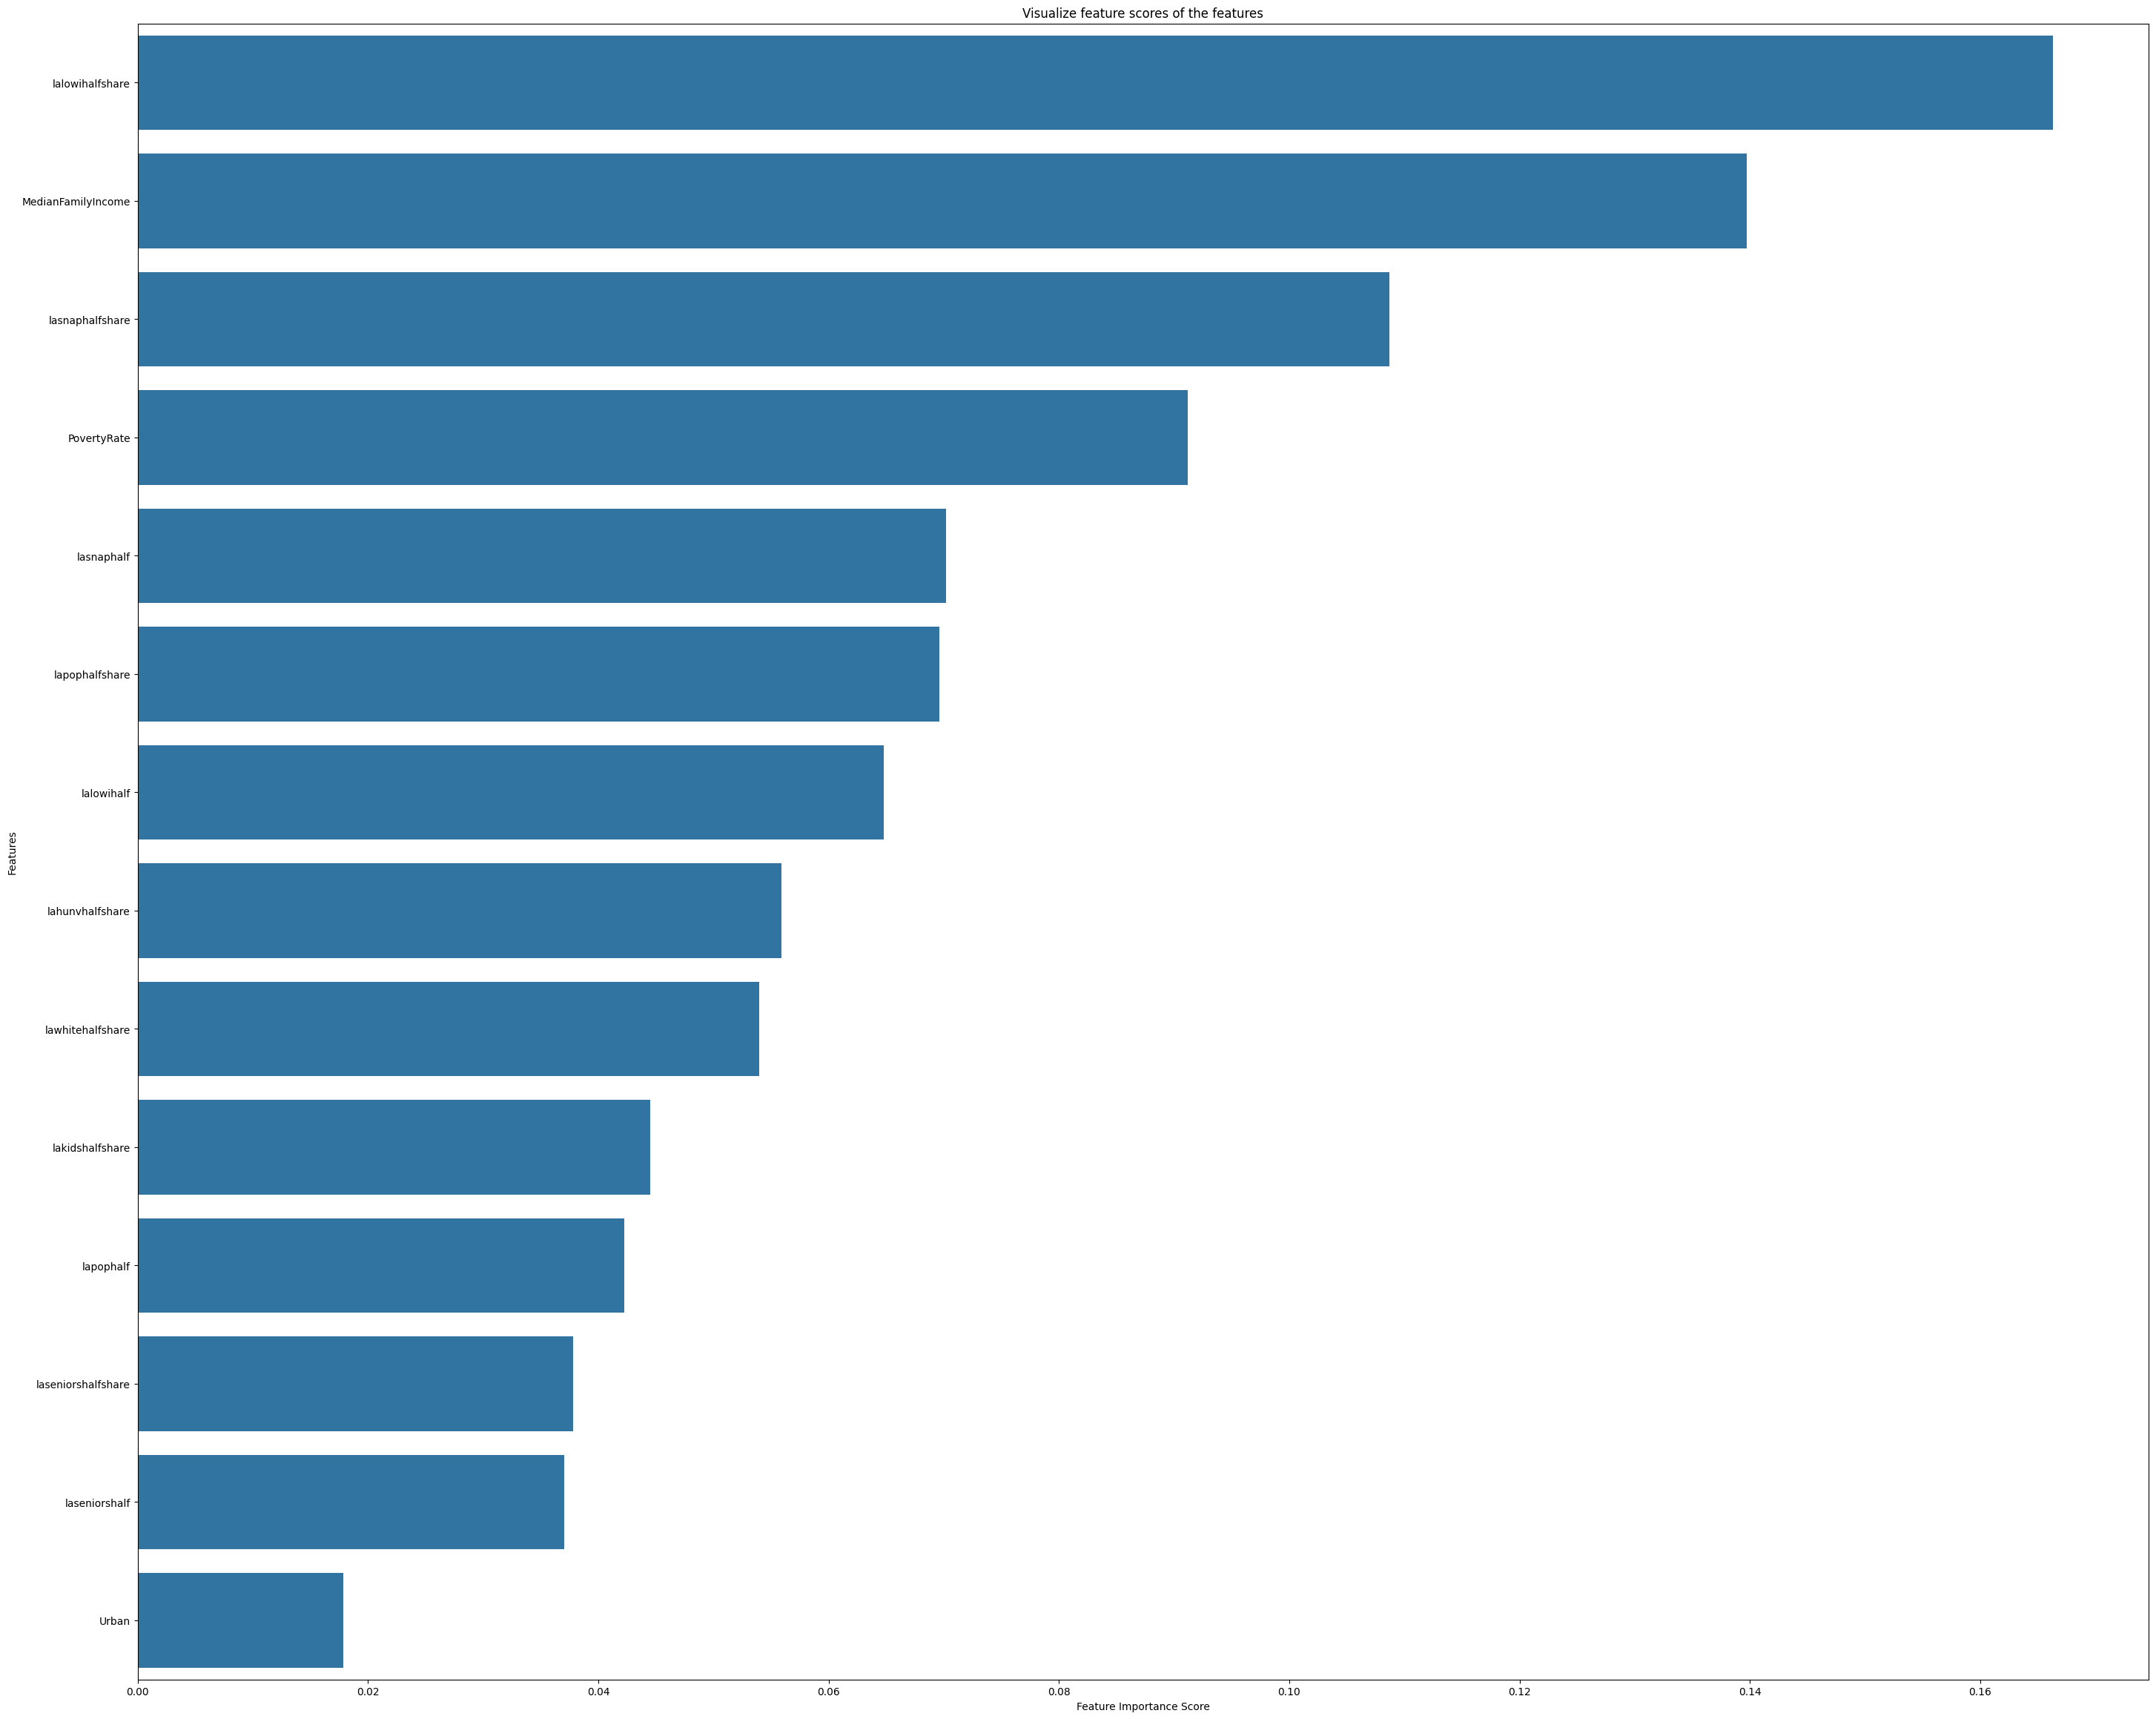

In [31]:
#Plotting new Random Forest Regressor
feature_scores = pd.Series(rf.feature_importances_,index=X_train_resampled.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize = (35,29))
ax = sns.barplot(x=feature_scores,y=X_train_resampled.columns)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

In [11]:
#Doing a RandomForestClassifer to get better precision and recall
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_resampled, y_train_resampled)

#Predict outcome from test
y_pred = clf.predict(X_test2)

print("Accuracy: \n", accuracy_score(y_test2,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test2,y_pred))
print("Classification Report: \n", classification_report(y_test2, y_pred))

scores = cross_val_score(clf, X_modified, y_modified, cv=5)
print(scores.mean())


Accuracy: 
 0.8615430399523845
Confusion Matrix: 
 [[10100  1463]
 [  398  1480]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.92     11563
           1       0.50      0.79      0.61      1878

    accuracy                           0.86     13441
   macro avg       0.73      0.83      0.76     13441
weighted avg       0.90      0.86      0.87     13441

0.9143354632326111


In [12]:
#Using RandomizedSearchCV to find the best hyperparameters to adjust for LogisticRegression
param_dist = {
   'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_resampled,y_train_resampled)

print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

KeyboardInterrupt: 